In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
metadata_dict = {}
metadata = pd.read_csv('/home/mar/Documents/TFM/June/Task1_v4/Metadata_HB/metadata_joined.csv')
lst = []
for i in metadata['type']:
    if str(i).startswith('Hepatoblastoma'):
        lst.append('case')
    elif str(i).startswith('Normal'):
        lst.append('control')
    else:
        lst.append('other')
metadata['class'] = lst
metadata_dict = pd.Series(metadata['class'].values,index=metadata['sample']).to_dict()

In [5]:
data = pd.read_csv('/home/mar/Documents/TFM/June/Task1_v4/Matrices_HB/Joint_matrix.txt', sep=';', index_col=0)
data.columns = data.columns.map(metadata_dict)

In [6]:
data_T = data.transpose()
data_T.head()

gene,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
control,74.53173,0.00000,283.19211,7498.68823,0.00000,0.00000,0.0,0.0,0.71118,0.0,...,0.00000,0.00000,0.00000,0.00000,0.71118,1.84907,45.23109,0.42671,336.53066,0.14224
control,52.28544,0.00000,422.66949,2938.02617,0.00000,0.34626,0.0,0.0,2.53925,0.0,...,0.46168,0.46168,1.26962,26.08501,0.00000,0.00000,1.61589,75.94662,2.77009,64.17374
control,4.43133,0.00000,16.24823,2845.37141,0.11362,0.56812,0.0,0.0,0.00000,0.0,...,2.61335,0.00000,1.47711,0.11362,7.61281,0.00000,35.67793,0.00000,0.34087,31.24659
case,0.10047,0.20094,0.10047,479.04307,2.91364,0.40188,0.0,0.0,46.91970,0.0,...,0.00000,0.00000,1.30612,0.50235,0.50235,0.30141,9.54469,19.29033,32.75336,5.52587
case,27.08854,0.79672,0.53115,398.36088,0.26557,0.26557,0.0,0.0,0.00000,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.53115,7.17050,6.37377,46.74101,23.90165


### AXIN2

In [10]:
IGFALS = data_T['IGFALS']
IGFALS = pd.DataFrame(IGFALS)
IGFALS.columns = ['value']
IGFALS = IGFALS.rename_axis('type')
IGFALS

,value
type,
control,0.14224
control,20.77567
control,0.90899
case,0.10047
case,2.12459
...,...
control,13.24551
control,1.14351
control,99.03659


In [8]:
# Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8

# set seaborn whitegrid theme
sns.set(style="whitegrid")

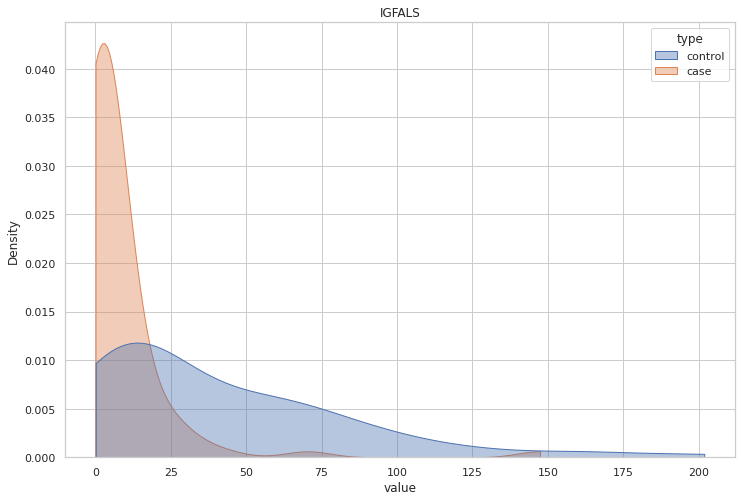

In [11]:
sns.kdeplot(data=IGFALS, x="value", hue="type", cut=0, fill=True, common_norm=False, alpha=0.4).set_title('IGFALS')
plt.show()


In [38]:
axin2 = data.iloc["AXIN2"]

In [39]:
axin2

control       5.055243
control       4.782392
control       4.045798
case         10.877195
case          8.789533
              ...     
case       2682.000000
case       3216.000000
case       2580.000000
case        916.000000
case       3409.000000
Name: AXIN2, Length: 97, dtype: float64